In [1]:
%%info

We can install notebook scoped libraries for data exploration before ML activities. Let's start with listing the existing ones.   

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1647821053317_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.0.3)
docutils (0.14)
jmespath (0.10.0)
joblib (1.1.0)
lockfile (0.11.0)
lxml (4.6.3)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.16.5)
pip (9.0.1)
py-dateutil (2.2)
pystache (0.5.4)
python-daemon (2.2.3)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

Install notebook-scoped libraries

In [3]:
sc.install_pypi_package("pandas==1.0.1") #Install pandas version 1.0.5
sc.install_pypi_package("numpy==1.20.2") #Intall numpy version 1.19.5
sc.install_pypi_package("matplotlib==3.2.0","https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Found existing installation: numpy 1.16.5
    Not uninstalling numpy at /usr/local/lib64/python3.7/site-packages, outside environment /tmp/1649174950647-0

  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/6b/44f7f8f1e110027cf88956b59f2fad776cca7e1704396d043f89effd3a0e/typing_extensions-4.1.1-py3-none-any.whl

You are usi

In [4]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.0.3)
cycler (0.11.0)
docutils (0.14)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.3)
matplotlib (3.2.0)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.20.2)
pandas (1.0.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
typing-extensions (4.1.1)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [5]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("s3://vasveena-test-demo/emr-sagemaker-ml/sparkml/inputdata/train.csv"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [8]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

891

In [9]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [10]:
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('PassengerId', 'string'), ('Survived', 'string'), ('Pclass', 'string'), ('Name', 'string'), ('Sex', 'string'), ('Age', 'string'), ('SibSp', 'string'), ('Parch', 'string'), ('Ticket', 'string'), ('Fare', 'string'), ('Cabin', 'string'), ('Embarked', 'string')]

In [11]:
df.describe().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  summary        PassengerId  ... Cabin Embarked
0   count                891  ...   204      889
1    mean              446.0  ...  None     None
2  stddev  257.3538420152301  ...  None     None
3     min                  1  ...   A10        C
4     max                 99  ...     T        S

[5 rows x 13 columns]

In [13]:
from pyspark.sql.functions import col
dataset = df.select(col('Survived').cast('float'),
                         col('Pclass').cast('float'),
                         col('Sex'),
                         col('Age').cast('float'),
                         col('Fare').cast('float'),
                         col('Embarked')
                        )
dataset.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+------+----+-------+--------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|
+--------+------+------+----+-------+--------+
|     0.0|   3.0|  male|22.0|   7.25|       S|
|     1.0|   1.0|female|38.0|71.2833|       C|
|     1.0|   3.0|female|26.0|  7.925|       S|
|     1.0|   1.0|female|35.0|   53.1|       S|
|     0.0|   3.0|  male|35.0|   8.05|       S|
|     0.0|   3.0|  male|null| 8.4583|       Q|
|     0.0|   1.0|  male|54.0|51.8625|       S|
|     0.0|   3.0|  male| 2.0| 21.075|       S|
|     1.0|   3.0|female|27.0|11.1333|       S|
|     1.0|   2.0|female|14.0|30.0708|       C|
|     1.0|   3.0|female| 4.0|   16.7|       S|
|     1.0|   1.0|female|58.0|  26.55|       S|
|     0.0|   3.0|  male|20.0|   8.05|       S|
|     0.0|   3.0|  male|39.0| 31.275|       S|
|     0.0|   3.0|female|14.0| 7.8542|       S|
|     1.0|   2.0|female|55.0|   16.0|       S|
|     0.0|   3.0|  male| 2.0| 29.125|       Q|
|     1.0|   2.0|  male|null|   13.0|       S|
|     0.0|   

Explore data using matplot 

In [23]:
# Distribution of survivors 
survival_dist = df.groupBy('Survived','Sex').count().orderBy('Sex').toPandas()

import matplotlib.pyplot as plt
plt.clf()
labels = [f"Survivors: {survivors}" for survivors in survival_dist['Survived']]
survivors = [survivors for survivors in survival_dist['count']]
colors = ['#00876c', '#89c079', '#fff392', '#fc9e5a', '#de425b']
fig, ax = plt.subplots(figsize=(8,5))
w,a,b = ax.pie(survivors, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of survivors for gender')
ax.legend(w, labels, title="Survivors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

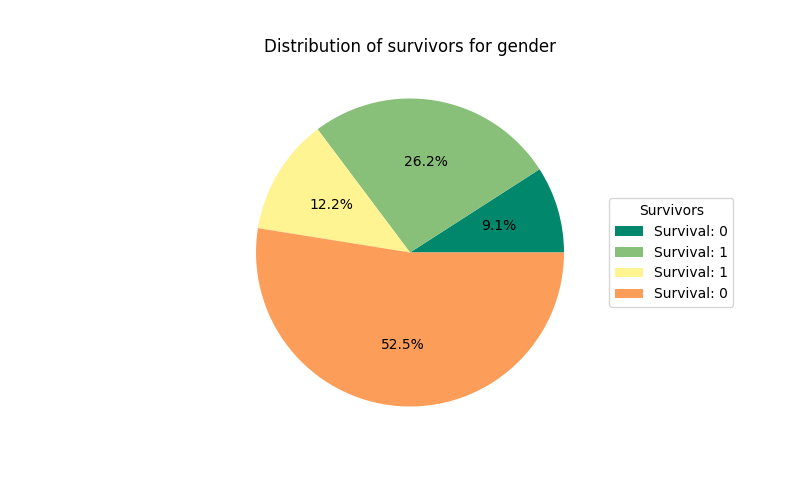

In [22]:
%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

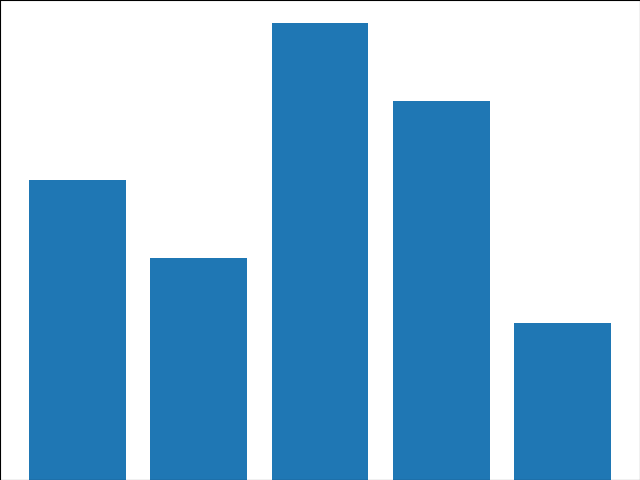

In [47]:
%matplot plt

In [16]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|177|   0|       2|
+--------+------+---+---+----+--------+

In [17]:
dataset = dataset.replace('?', None)\
        .dropna(how='any')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Spark ML lib works with only numeric data. But we still want to use the Sex and the Embarked column. For that, we will need to encode them. To do it let’s use **StringIndexer** (Feature Transformers) (https://spark.apache.org/docs/latest/ml-features#stringindexer)

In [18]:
from pyspark.ml.feature import StringIndexer
dataset = StringIndexer(
    inputCol='Sex', 
    outputCol='Gender', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset = StringIndexer(
    inputCol='Embarked', 
    outputCol='Boarded', 
    handleInvalid='keep').fit(dataset).transform(dataset)
dataset.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+------+----+-------+--------+------+-------+
|Survived|Pclass|   Sex| Age|   Fare|Embarked|Gender|Boarded|
+--------+------+------+----+-------+--------+------+-------+
|     0.0|   3.0|  male|22.0|   7.25|       S|   0.0|    0.0|
|     1.0|   1.0|female|38.0|71.2833|       C|   1.0|    1.0|
|     1.0|   3.0|female|26.0|  7.925|       S|   1.0|    0.0|
|     1.0|   1.0|female|35.0|   53.1|       S|   1.0|    0.0|
|     0.0|   3.0|  male|35.0|   8.05|       S|   0.0|    0.0|
|     0.0|   1.0|  male|54.0|51.8625|       S|   0.0|    0.0|
|     0.0|   3.0|  male| 2.0| 21.075|       S|   0.0|    0.0|
|     1.0|   3.0|female|27.0|11.1333|       S|   1.0|    0.0|
|     1.0|   2.0|female|14.0|30.0708|       C|   1.0|    1.0|
|     1.0|   3.0|female| 4.0|   16.7|       S|   1.0|    0.0|
|     1.0|   1.0|female|58.0|  26.55|       S|   1.0|    0.0|
|     0.0|   3.0|  male|20.0|   8.05|       S|   0.0|    0.0|
|     0.0|   3.0|  male|39.0| 31.275|       S|   0.0|    0.0|
|     0.

In [19]:
dataset.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Survived', 'float'), ('Pclass', 'float'), ('Sex', 'string'), ('Age', 'float'), ('Fare', 'float'), ('Embarked', 'string'), ('Gender', 'double'), ('Boarded', 'double')]

Drop columns not needed 

In [20]:
dataset = dataset.drop('Sex')
dataset = dataset.drop('Embarked')
dataset.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+----+-------+------+-------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|
+--------+------+----+-------+------+-------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|
|     0.0|   3.0|39.0| 31.275|   0.0|    0.0|
|     0.0|   3.0|14.0| 7.8542|   1.0|    0.0|
|     1.0|   2.0|55.0|   16.0|   1.0|    0.0|
|     0.0|   3.0| 2.0| 29.125|   0.0|    2.0|
|     0.0|   3.0|31.0|   18.0|   1.0|    0.0|
|     0.0|   2.0|35.0|   26.0|   0.0|    0.0|
|     1.0|   2.0|34.0|   13.0|   0

Assemble all the features with VectorAssembler

In [21]:
required_features = ['Pclass',
                    'Age',
                    'Fare',
                    'Gender',
                    'Boarded'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
transformed_data.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+----+-------+------+-------+--------------------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|            features|
+--------+------+----+-------+------+-------+--------------------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|[3.0,22.0,7.25,0....|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|[1.0,38.0,71.2833...|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|[3.0,26.0,7.92500...|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|[1.0,35.0,53.0999...|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|[3.0,35.0,8.05000...|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|[1.0,54.0,51.8624...|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|[3.0,2.0,21.07500...|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|[3.0,27.0,11.1332...|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|[2.0,14.0,30.0708...|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|[3.0,4.0,16.70000...|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|[1.0,58.0,26.5499...|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|[3.0,20.0,8.05000

Now, finally we have our transformed data ready for ML activities. Lets begin building our ML model.

First, let's split data into train and test (70:30 split). 

In [23]:
(training_data, test_data) = transformed_data.randomSplit([0.7,0.3])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, we can build and fit an ML model to our dataset to predict the “Survived” columns with all the other features. We will be using a Random Forest Classifier. This is actually an estimator that we have to fit.

In [24]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol='Survived', 
                            featuresCol='features',
                            maxDepth=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's fit the model 

In [25]:
model = rf.fit(training_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This gives us the transformer. Finally, we can make predictions using the test dataset for evaluation:

In [28]:
predictions = model.transform(test_data)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
predictions.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------+----+--------+------+-------+--------------------+--------------------+--------------------+----------+
|Survived|Pclass| Age|    Fare|Gender|Boarded|            features|       rawPrediction|         probability|prediction|
+--------+------+----+--------+------+-------+--------------------+--------------------+--------------------+----------+
|     0.0|   1.0| 2.0|  151.55|   1.0|    0.0|[1.0,2.0,151.5500...|[0.24137293621325...|[0.01206864681066...|       1.0|
|     0.0|   1.0|19.0|    53.1|   0.0|    0.0|[1.0,19.0,53.0999...|[11.8842540950325...|[0.59421270475162...|       0.0|
|     0.0|   1.0|24.0|    79.2|   0.0|    1.0|[1.0,24.0,79.1999...|[8.57008643434789...|[0.42850432171739...|       1.0|
|     0.0|   1.0|24.0|247.5208|   0.0|    1.0|[1.0,24.0,247.520...|[9.92956151092823...|[0.49647807554641...|       1.0|
|     0.0|   1.0|30.0|   27.75|   0.0|    1.0|[1.0,30.0,27.75,0...|[6.54807315252230...|[0.32740365762611...|       1.0|
|     0.0|   1.0|31.0| 50.4958| 

We have now successfully created an ML model. Now let’s see how well we did. For that, we will use a basic metric called the accuracy.

In [29]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol='Survived', 
    predictionCol='prediction', 
    metricName='accuracy')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
accuracy = evaluator.evaluate(predictions)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
accuracy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.7971698113207547

Our model's accuracy is 79.7%

In [ ]:
sc.uninstall_package('pandas')